# Exercise 1
plot Green's functions of the single-orbital fermionic Hubbard atom at half filling,
$$
G_{\sigma\sigma'}(z) = \frac{1}{2}\left(\frac{1}{z-U/2} + \frac{1}{z+U/2} \right)\delta_{\sigma\sigma'},
$$

$$
G_{\sigma\sigma'} = \frac{-1}{2}\left(\frac{e^{-\tau U/2}}{1+e^{-\beta U/2}} + \frac{e^{\tau U/2}}{1+e^{\beta U/2}} \right).
$$

In [359]:
using PyPlot
using LinearAlgebra
using BenchmarkTools
using PyCall 

In [360]:
function G(τ,U,β)
	- (exp(-τ*U/2)/(1+exp(-β*U/2)) + exp(τ*U/2)/(1+exp(β*U/2))) / 2
end

G (generic function with 2 methods)

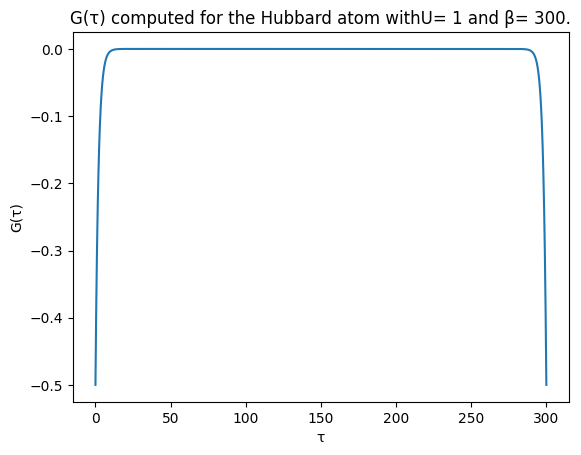

PyObject Text(24.000000000000007, 0.5, 'G(τ)')

In [361]:
U = 1
β = 300
τs = LinRange(0,300,600)
plt.figure()
plt.plot(τs,G.(τs,U,β))
plt.title("G(τ) computed for the Hubbard atom withU= 1 and β= 300.")
plt.xlabel("τ")
plt.ylabel("G(τ)")
#plt.savefig("exercise_1_1.pdf")

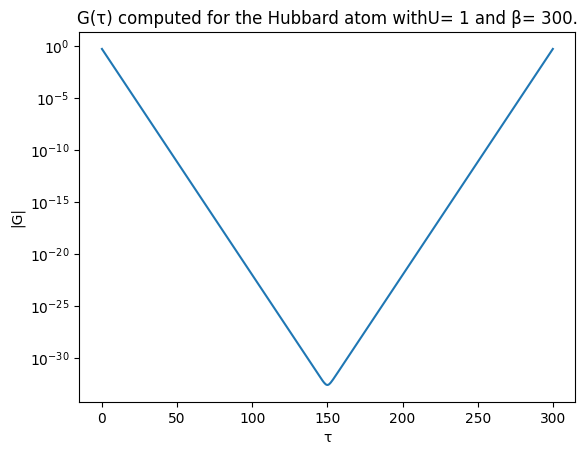

PyObject Text(24.499999999999993, 0.5, '|G|')

In [362]:
plt.figure()
plt.plot(τs,abs.(G.(τs,U,β)))
plt.title("G(τ) computed for the Hubbard atom withU= 1 and β= 300.")
plt.yscale("log")
plt.xlabel("τ")
plt.ylabel("|G|")
#plt.savefig("exercise_1_2.pdf")

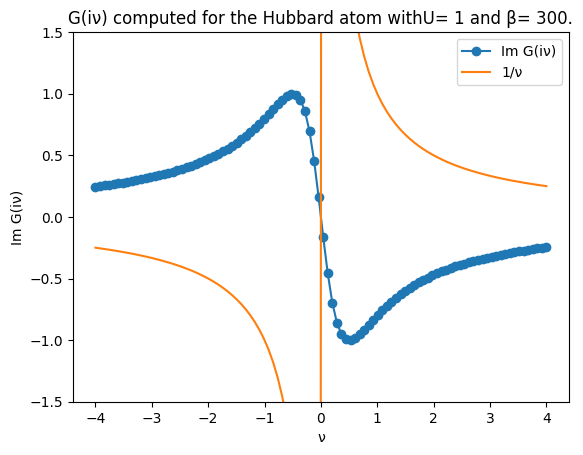

PyObject <matplotlib.legend.Legend object at 0x17d676a60>

In [363]:
function G(z,U)
	(1/(z-U/2) + 1/(z+U/2))/2
end

U  = 1.0
νs = LinRange(-4,4,100)
plt.figure()
plt.plot(νs,imag.(G.(im.*νs,U)),marker="o",label="Im G(iν)")
plt.plot(νs,1 ./ νs,label="1/ν")
plt.title("G(iν) computed for the Hubbard atom withU= 1 and β= 300.")
plt.xlabel("ν")
plt.ylabel("Im G(iν)")
plt.ylim(-1.5,1.5)
plt.legend(loc="upper right")
#plt.savefig("exercise_1_3.pdf")

# Exercise 2
For the Hubbard atom, Green's function reads
$$
G_{\sigma\sigma'}(z) = \frac{1}{2}\left(\frac{1}{z-U/2} + \frac{1}{z+U/2} \right)\delta_{\sigma\sigma'}.
$$
Using this formula
$$
T\sum_{\nu}\frac{e^{-i\nu T}}{i\nu-\epsilon} = -\frac{e^{-\epsilon\tau}}{1+e^{-\beta\epsilon}},
$$
we obtain 
$$
G_{\sigma\sigma'}(\tau) 
= T\sum_n e^{-i\omega_n\tau}G(i\omega_n)
= \frac{T}{2}\sum_n \left[\frac{e^{-i\omega_n\tau}}{i\omega_n-U/2} + \frac{e^{-i\omega_n\tau}}{i\omega_n+U/2}\right]\delta_{\sigma\sigma'}
= -\frac{1}{2}\left(\frac{e^{\tau U/2}}{1+e^{-\beta U/2}} + \frac{e^{\tau U/2}}{1+e^{\beta U/2}}\right)\delta_{\sigma\sigma'}.
$$

# Exercise 3
Please numerically check how $G(\tau)$ of the Hubbard atom behaves near $\tau= 0$ if we truncate the summation in the following equation at some frequency.
$$
T\sum_{\nu}\frac{e^{-i\nu T}}{i\nu-\epsilon} = -\frac{e^{-\epsilon\tau}}{1+e^{-\beta\epsilon}}.
$$
$G(\tau)$ reads
$$
G(\tau) = T\sum_n e^{-i\omega_n\tau}G(i\omega_n)
$$
where $\omega_n = (2n+1)\pi T.$

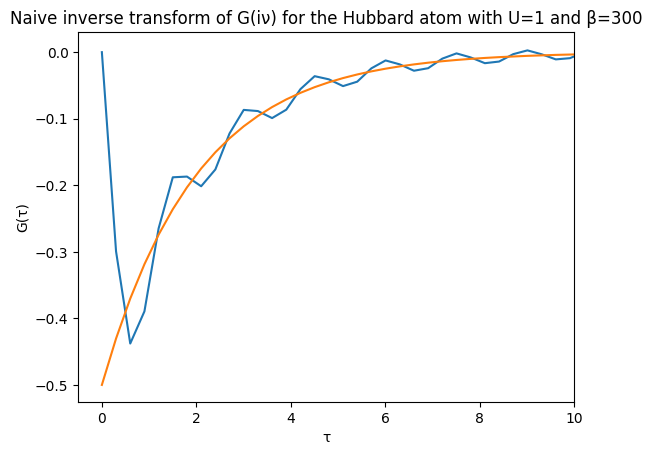

PyObject Text(0.5, 1.0, 'Naive inverse transform of G(iν) for the Hubbard atom with U=1 and β=300')

In [364]:
U = 1.
β = 300.
T = 1/β
num_tau = 1000
τs = LinRange(0,β,num_tau)
num_omega = 200
ω_n = [(2n+1)*π*T for n in -num_omega:num_omega]

function naive_inverse_Giv_forloop(num_tau,ω_n,U,T,τs)
	G_tau = zeros(Complex,num_tau) 

    for i_tau in 1:num_tau
	    for j_omega in 1:length(ω_n)
		    G_tau[i_tau] += T * exp(- im * ω_n[j_omega] * τs[i_tau]) * G(im * ω_n[j_omega],U)
	    end
    end
	G_tau
end

G_tau = naive_inverse_Giv_forloop(num_tau,ω_n,U,T,τs)
plt.figure()
plt.plot(τs,real.(G_tau))
plt.plot(τs,G.(τs,U,β))
plt.xlim(-0.5,10)
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.title("Naive inverse transform of G(iν) for the Hubbard atom with U=1 and β=300")
#plt.savefig("Exercise_3.pdf")

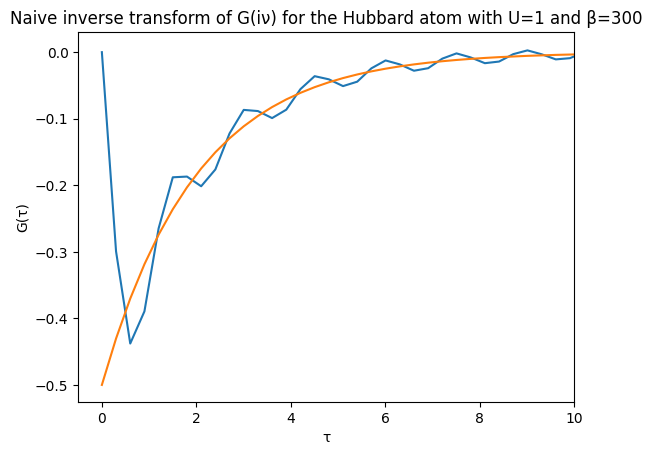

PyObject Text(0.5, 1.0, 'Naive inverse transform of G(iν) for the Hubbard atom with U=1 and β=300')

In [365]:
# 行列積での計算
#ω_n = (2n+1)πT
U = 1.
β = 300.
T = 1/β
num_tau = 1000
τs = collect(LinRange(0,β,num_tau))
num_omega = 200
ω_n = [(2n+1)*π*T for n in -num_omega:num_omega]

function naive_inverse_Giv_matprod(τs,ω_n,U,T)
	G_iν = G.(im .* ω_n,U)
    exp_tau_iomega = exp.(τs * transpose(-im .* ω_n))
    G_tau = T .* (exp_tau_iomega * G_iν)
end

G_tau = naive_inverse_Giv_matprod(τs,ω_n,U,T)
plt.figure()
plt.plot(τs,real.(G_tau))
plt.plot(τs,G.(τs,U,β))
plt.xlim(-0.5,10)
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.title("Naive inverse transform of G(iν) for the Hubbard atom with U=1 and β=300")
#plt.savefig("Exercise_3.pdf")

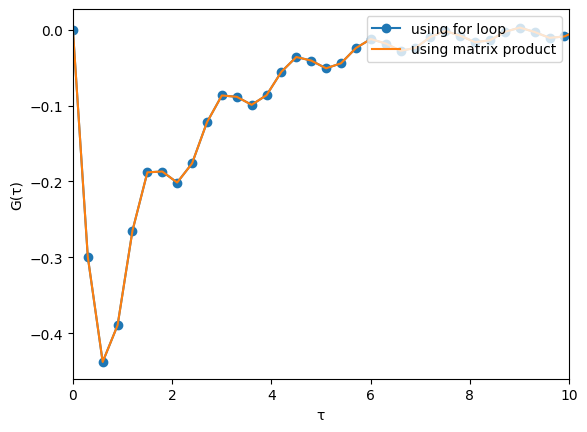

PyObject <matplotlib.legend.Legend object at 0x10900d160>

In [366]:
G_tau_1 = naive_inverse_Giv_forloop(num_tau,ω_n,U,T,τs)
G_tau_2 = naive_inverse_Giv_matprod(τs,ω_n,U,T)
plt.figure()
plt.plot(τs,real.(G_tau_1),label="using for loop",marker="o")
plt.plot(τs,real.(G_tau_2),label="using matrix product")
plt.xlim(0,10)
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.legend(loc="upper right")
#plt.savefig("check_exercise_3.pdf")

In [367]:
# Benchmark
@benchmark naive_inverse_Giv_forloop(num_tau,ω_n,U,T,τs)

BenchmarkTools.Trial: 
  memory estimate:  24.48 MiB
  allocs estimate:  802001
  --------------
  minimum time:     47.109 ms (0.00% GC)
  median time:      70.670 ms (0.00% GC)
  mean time:        78.812 ms (6.13% GC)
  maximum time:     185.701 ms (14.83% GC)
  --------------
  samples:          64
  evals/sample:     1

In [368]:
@benchmark naive_inverse_Giv_matprod(τs,ω_n,U,T)

BenchmarkTools.Trial: 
  memory estimate:  12.28 MiB
  allocs estimate:  8
  --------------
  minimum time:     9.269 ms (0.00% GC)
  median time:      10.060 ms (0.00% GC)
  mean time:        12.434 ms (13.15% GC)
  maximum time:     129.396 ms (77.14% GC)
  --------------
  samples:          403
  evals/sample:     1

# Exercise 4

In [369]:
using Interpolations,Dierckx

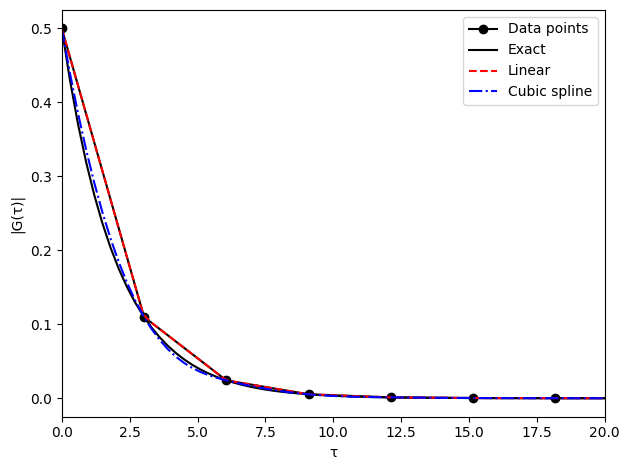

In [370]:
# linear and cubic spline interpolations of G(τ)
U = 1.
β = 300.
num_tau = 100

τs = collect(range(0.0,β,length=num_tau))
G_tau = G.(τs,U,β)
τs_new = collect(range(0,β,length=10*num_tau))

# Linear interpolation
G_tau_linear = LinearInterpolation(τs,G_tau)(τs_new)

# Cubic spline interpolation
G_tau_cubic_spline = Spline1D(τs,G_tau)(τs_new)

plt.figure()
plt.plot(τs,abs.(G_tau),marker="o",label="Data points",color="black")
plt.plot(τs_new,abs.(G.(τs_new,U,β)),label="Exact",color="black")
plt.plot(τs_new,abs.(G_tau_linear),ls="--",label="Linear",color="red")
plt.plot(τs_new,abs.(G_tau_cubic_spline),ls="-.",label="Cubic spline",color="blue")
plt.xlabel("τ")
plt.ylabel("|G(τ)|")
plt.xlim(0,20)
plt.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("Exercise_4_1.pdf")

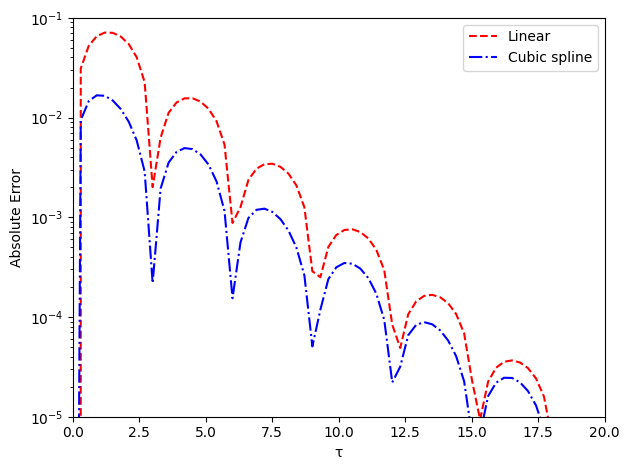

In [371]:
plt.figure()
plt.semilogy(τs_new,abs.(G_tau_linear       .- G.(τs_new,U,β)), ls="--",label="Linear",      color="red")
plt.semilogy(τs_new,abs.(G_tau_cubic_spline .- G.(τs_new,U,β)), ls="-.",label="Cubic spline",color="blue")
plt.xlabel("τ")
plt.xlabel("τ")
plt.ylabel("Absolute Error")
plt.xlim(0,20)
plt.ylim(1e-5,1e-1)
plt.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("Exercise_4_2.pdf")

# Exercise 4.5
Implement Fourier transformation using the Gauss quadrature.
$$
G(i\nu) = \int_0^{\beta}\mathrm{d}\tau e^{i\nu_n\tau}G(\tau) \sim \sum_{i=1}^n \tilde{w}_ie^{i\nu\tau_i}G(\tau_i)
$$
where $\tau_i = (x_i+1)\beta/2$ and $\tilde{w}_i = \beta w_i/2$

In [372]:
using FastGaussQuadrature,SpecialPolynomials

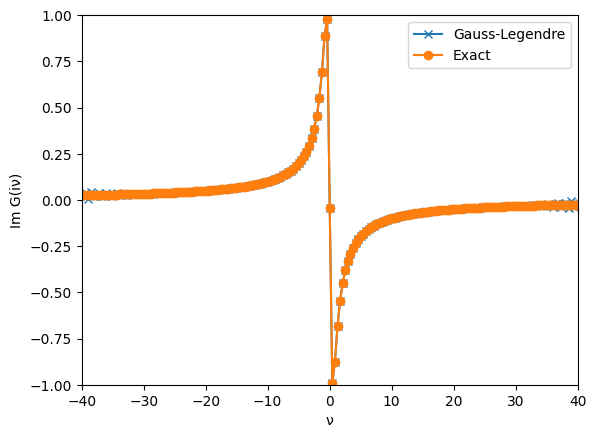

PyObject <matplotlib.legend.Legend object at 0x17daae940>

In [373]:
U = 1.
β = 300.
deg = 1000
x, w = gausslegendre(deg)
τs_leggauss = (x .+ 1)*β/2
ws_leggauss = (β/2) * w

ω_max = 2000
ω_n = [(2i+1)*π/β for i in -ω_max:ω_max][1:20:end]
G_tau = G.(τs_leggauss,U,β)
exp_iomega_tau = exp.((im .* ω_n) * transpose(τs_leggauss))

G_iν_leggauss = exp_iomega_tau * (ws_leggauss .* G_tau)
G_iν_exact    = G.(im .* ω_n,U)
 
plt.figure()
plt.plot(ω_n,imag.(G_iν_leggauss),ls="-",marker="x",label="Gauss-Legendre")
plt.plot(ω_n,imag.(G_iν_exact),   ls="-",marker="o",label="Exact")
plt.xlim(-40,40)
plt.ylim(-1,1)
plt.xlabel("ν")
plt.ylabel("Im G(iν)")
plt.legend(loc="upper right")
#plt.savefig("Exercise_4.5_1.pdf")

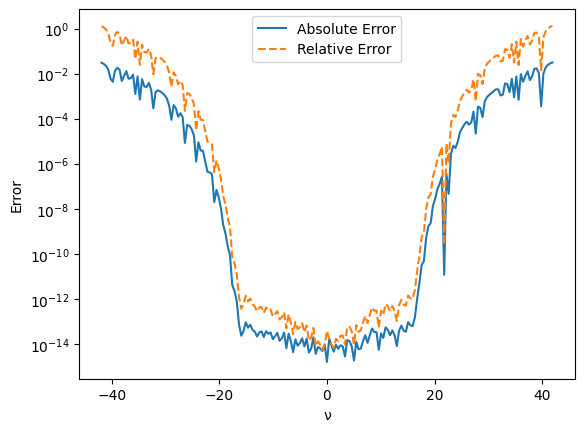

PyObject <matplotlib.legend.Legend object at 0x17db30f10>

In [374]:
plt.figure()
plt.semilogy(ω_n,abs.(G_iν_leggauss .- G_iν_exact),ls="-",label="Absolute Error")
plt.semilogy(ω_n,abs.((G_iν_leggauss .- G_iν_exact) ./ G_iν_exact),ls="--",label="Relative Error")
plt.xlabel("ν")
plt.ylabel("Error")
plt.legend(loc="upper center")
#plt.savefig("Exercise_4.5_2.pdf")


# Exercise 5


# Exercise 6
Implement following equations for the Hubbard atom 
$$
\tilde{G}(i\nu) = G(i\nu) - \frac{c^0}{i\nu} \ ,
$$
$$
G(\tau) \sim \sum_{n=-n_{\mathrm{max}}}^{n_{\mathrm{max}}}e^{i\nu_n\tau}\tilde{G}(i\nu) - \frac{c^0}{2},
$$
and comform that the discontinuity at $\tau = 0$ is correctly reproduced.

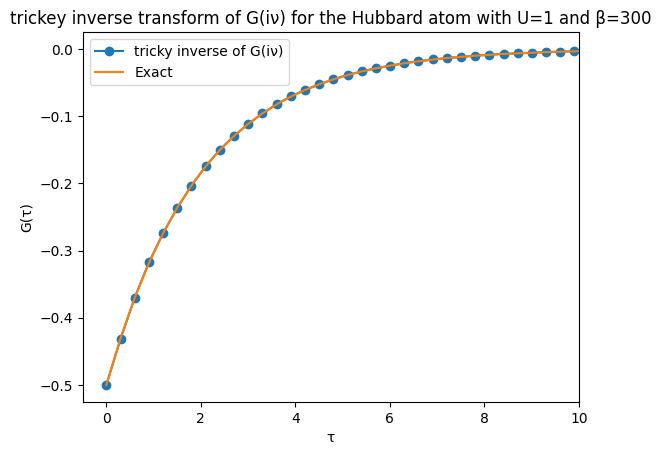

PyObject <matplotlib.legend.Legend object at 0x17d943d30>

In [375]:
# 行列積での計算
#ω_n = (2n+1)πT
U = 1.
β = 300.
T = 1/β
num_tau = 1000
τs = collect(range(0,β,length=num_tau))
num_omega = 200
ω_n = [(2n+1)*π*T for n in -num_omega:num_omega]

function trickey_inverse_Giv_matprod(τs,ω_n,U,T)
	G_iν_tilde = G.(im .* ω_n,U) .- (1 ./ (im .* ω_n))
    exp_tau_iomega = exp.(τs * transpose(-im .* ω_n))
    G_tau = T .* (exp_tau_iomega * G_iν_tilde) .- 1/2
end

G_tau = trickey_inverse_Giv_matprod(τs,ω_n,U,T)
plt.figure()
plt.plot(τs,real.(G_tau),marker="o",label="tricky inverse of G(iν)")
plt.plot(τs,G.(τs,U,β),label="Exact")
plt.xlim(-0.5,10)
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.title("trickey inverse transform of G(iν) for the Hubbard atom with U=1 and β=300")
plt.legend(loc="upper left")
#plt.savefig("Exercise_6.pdf")

# Exercise 7
Compute expansion coefficients of the Green’s function of the Hubbard atom for lower temperatures. Check how the number of basis functions scales with respect to $\beta$.
For $0<\tau<\beta$,
$$
G(\tau) = \sum_{l=0}^{\infty}\frac{\sqrt{2l+1}}{\beta}P_l(x(\tau))G_l
$$
$$
G_l = \sqrt{2l+1}\int_0^{\beta}\mathrm{d}\tau P_l(x(\tau))G(\tau)
$$

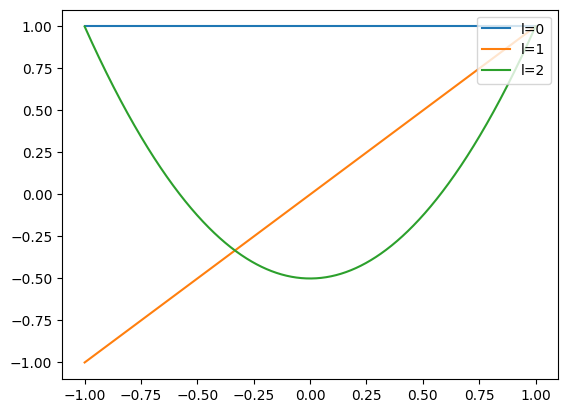

PyObject <matplotlib.legend.Legend object at 0x17dc928b0>

In [376]:
deg = 100
lvec = [(i-1) for i in 1:deg]
P_l  = [SpecialPolynomials.basis(Legendre,l-1) for l in 1:deg]
xs = collect(range(-1,1,length=1000))
plt.figure()
for l in 1:3
    plt.plot(xs,P_l[l].(xs),label="l=$(l-1)")
end
plt.legend(loc="upper right")
#plt.savefig("check_legendre_basis.pdf")

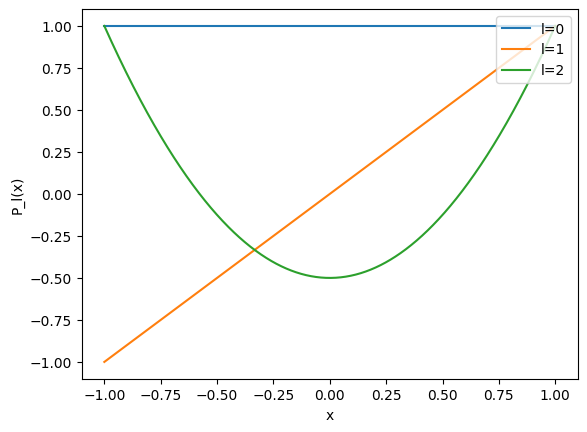

Legendre{Float64,:x,1}
(1,)


PyObject <matplotlib.legend.Legend object at 0x17dd216d0>

In [377]:
println(typeof(P_l[1]))
println(size(P_l[1]))
legg_val = zeros(Float64,length(x),deg)
for l in 1:deg
    legg_val[:,l] = P_l[l].(xs)
end
legg_val
plt.figure()
for l in 1:3
    plt.plot(xs,legg_val[:,l],label="l=$(l-1)")
end
plt.xlabel("x")
plt.ylabel("P_l(x)")
plt.legend(loc="upper right")
#plt.savefig("check_legendre_basis2.pdf")


In [378]:
using OMEinsum,Einsum

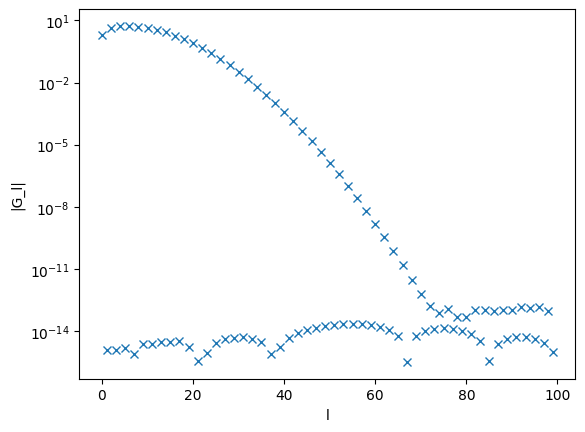

PyObject Text(24.500000000000007, 0.5, '|G_l|')

In [379]:
U = 1.
β = 300.
# set Gauss-Legendre quadrature
deg = 100
x, w = gausslegendre(deg)
τs_leggauss = (x .+ 1)*β/2
ws_leggauss = (β/2) * w

lvec = [(l-1) for l in 1:deg]
P_l  = [SpecialPolynomials.basis(Legendre,l-1) for l in 1:deg]
legg_val = zeros(Float64,deg,deg)
for l in 1:deg
    legg_val[:,l] = P_l[l].(x)
end

G_tau = G.(τs_leggauss,U,β)

G_l = zeros(Complex,deg)
@einsum G_l[l] = sqrt(2*lvec[l]+1) * legg_val[t,l] * G_tau[t] * ws_leggauss[t]

plt.figure()
plt.semilogy(lvec,abs.(G_l),ls=" ",marker="x")
plt.xlabel("l")
plt.ylabel("|G_l|")
#plt.savefig("Exercise_7.pdf")

# Check how the number of basis functions scales with respect to $\beta$

# Exercise 7.5
reconstruct $G(i\nu)$ from the expansion coefficients in the Legendre basis for the Hubbard atom with $U=1$ and $\beta = 300.$
We obtain Matsubara Green' function given by
$$
G(i\nu) = \sum_{l=0}^{\infty}T_{nl}G_l,
$$
where 
$$
T_{nl} = \frac{\sqrt{2l+1}}{\beta}\int_0^{\beta}\mathrm{d}\tau e^{i\nu\tau}P_l(x(\tau)) 
       = (-1)^ni^{l+1}\sqrt{2l+1}j_l(n\pi/2).
$$
$j_l(x)$ denotes sphrical bessel functon.

In [380]:
using SpecialFunctions

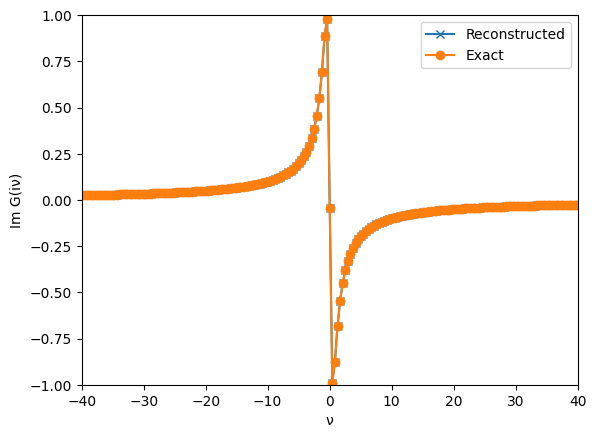

PyObject <matplotlib.legend.Legend object at 0x17ddea760>

In [381]:
U = 1.
β = 300.
T = 1/β
# set Gauss-Legendre quadrature
deg = 100
x, w = gausslegendre(deg)
τs_leggauss = (x .+ 1)*β/2
ws_leggauss = (β/2) * w

lvec = [(l-1) for l in 1:deg]
P_l  = [SpecialPolynomials.basis(Legendre,l-1) for l in 1:deg]
legg_val = zeros(Float64,deg,deg)
for l in 1:deg
    legg_val[:,l] = P_l[l].(x)
end

n_max = 2000
step_ν = 20
νs = [(2n+1)*π*T for n in -n_max:step_ν:n_max]
T_nl = zeros(Complex,length(νs),deg)

# we make T_nl using the spherical bessel function.
for i_l in 1:deg
    i_l = lvec[i_l]
    for j_n in 1:length(νs)
        j_ν = νs[j_n]
        # very dirty code!
        T_nl[j_n,i_l+1] = (-1)^(((1 + step_ν*(j_n-1)))-(n_max+1)) * im^(i_l+1) * sqrt(2*i_l+1) * sphericalbesselj(i_l,abs(j_ν / (π*T)) * π/2)
    end
end

G_iν_reconst =  T_nl * G_l

# Exact
G_iν_exact = G.(im .* νs,U)

plt.figure()
plt.plot(νs,imag.(G_iν_reconst),ls="-",marker="x",label="Reconstructed")
plt.plot(νs,imag.(G_iν_exact)  ,ls="-",marker="o",label="Exact")
plt.xlabel("ν")
plt.ylabel("Im G(iν)")
plt.xlim(-40,40)
plt.ylim(-1,1)
plt.legend(loc="upper right")
#plt.savefig("Exercise_7.5_1.pdf")

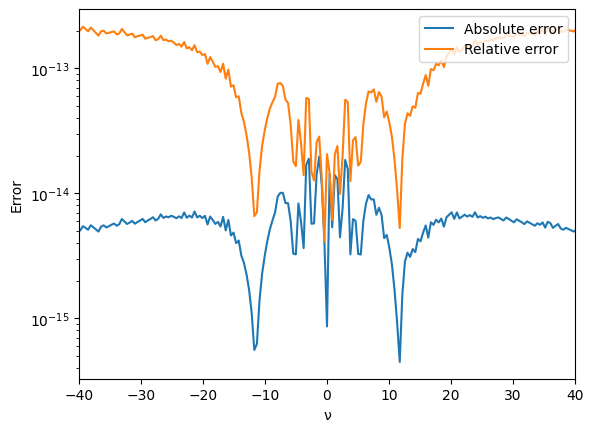

PyObject <matplotlib.legend.Legend object at 0x17decda90>

In [382]:
plt.figure()
plt.semilogy(νs,abs.(G_iν_reconst .- G_iν_exact),label="Absolute error")
plt.semilogy(νs,abs.((G_iν_reconst .- G_iν_exact) ./ G_iν_exact),ls="-",label="Relative error")
plt.xlabel("ν")
plt.ylabel("Error")
plt.xlim(-40,40)
plt.legend(loc="upper right")
#plt.savefig("Exercise_7.5_2.pdf")

# Exercise 8
$$
G(\tau) = - \int_{}^{}\mathrm{d}\omega K^{\mathrm{F}}(\tau,\omega)\rho(\omega),
$$
where
$$
K^{\mathrm{F}}(\tau,\omega) = \frac{e^{-\tau\omega}}{1+e^{-\beta\omega}},
$$
$$
G(\tau_i) = -\frac{2\omega_{\mathrm{max}}}{N_\omega} \sum_j K(\tau_i,\omega_j)\rho(\omega_j).
$$

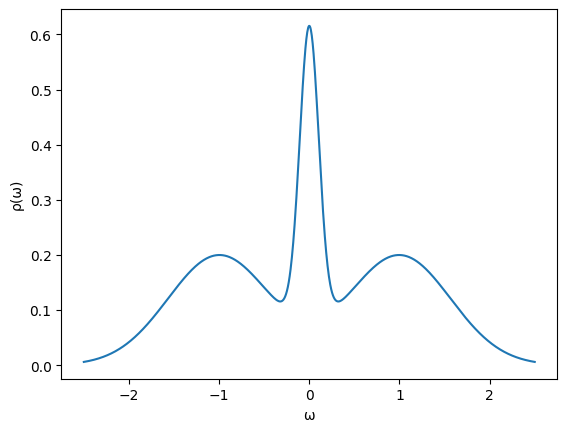

PyObject Text(24.000000000000007, 0.5, 'ρ(ω)')

In [383]:
function gaussian(x,μ,σ)
    (1/(sqrt(2π)*σ)) * exp(-((x .- μ)/σ)^2)
end

ρ = ω -> 0.2 * gaussian(ω,0.0,0.15) + 0.4 * gaussian(ω,1.0,0.8) + 0.4 * gaussian(ω,-1.0,0.8)
ωs = collect(range(-2.5,2.5,length=1000))
plt.figure()
plt.plot(ωs,ρ.(ωs))
plt.xlabel("ω")
plt.ylabel("ρ(ω)")
#plt.savefig("check_spectural_function.pdf")

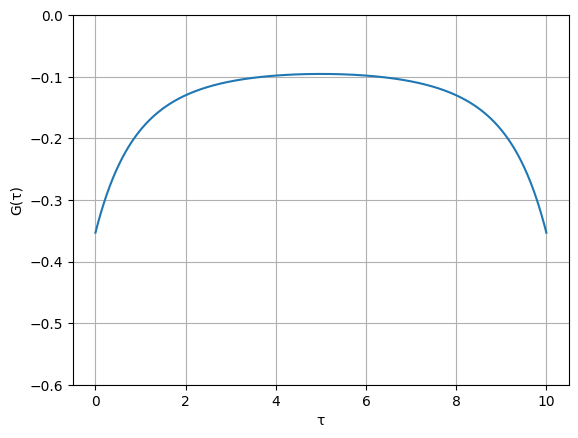

In [384]:
function kernel_f(τ,ω,β)
    exp(-τ*ω) / (1+exp(-β*ω))
end

β = 10.0
ω_max = 10.0
N_ω = 1000
N_τ = 1000
ωs = collect(range(-ω_max,ω_max,length=N_ω))
τs = collect(range(0,β,length=N_τ))
K_tau_omega = zeros(Float64,N_τ,N_ω)
for j_ω in 1:N_ω
    for i_τ in 1:N_τ
        K_tau_omega[i_τ,j_ω] = kernel_f(τs[i_τ],ωs[j_ω],β)
    end
end

ρ_ω = ρ.(ωs)
G_tau = zeros(Float64,N_τ)
@einsum G_tau[i] = - (2ω_max/N_ω) * K_tau_omega[i,j] * ρ_ω[j]

plt.figure()
plt.plot(τs,G_tau)
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.ylim(-0.6,0)
plt.grid()
#plt.savefig("check_g_tau.pdf")


Reconstruct $\rho(\omega)$
$$
\rho(\omega_j) = -\sum_i(K^{-1})_{ji}G(\tau_i)
$$
where $K^{-1}$ is inverse matrix of $K$ given by
$$
(K)_{ij} = \frac{2\omega_{\mathrm{max}}}{N_{\omega}}K(\tau_i,\omega_i).
$$

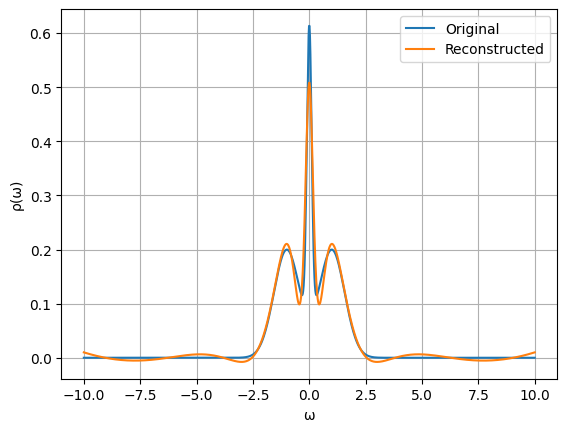

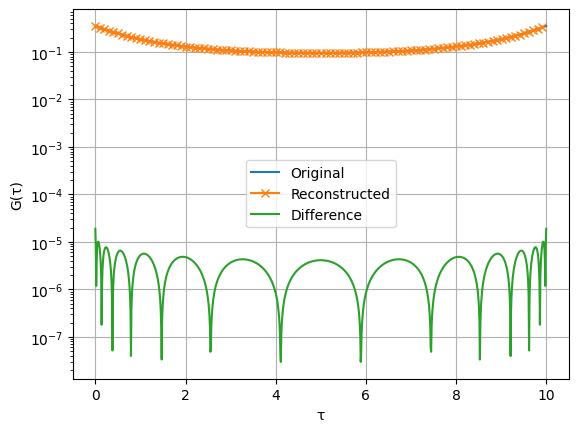

PyObject <matplotlib.legend.Legend object at 0x17daf21f0>

In [385]:
ρ_ω_reconst =  zeros(Float64,N_ω)
K_ij = (2ω_max/N_ω) .* K_tau_omega
K_inv = pinv(K_ij,rtol=1e-3)
@einsum ρ_ω_reconst[j] =  - K_inv[j,i] * G_tau[i]

plt.figure()
plt.plot(ωs,ρ.(ωs),label="Original")
plt.plot(ωs,ρ_ω_reconst,label="Reconstructed")
plt.xlabel("ω")
plt.ylabel("ρ(ω)")
plt.grid()
plt.legend(loc="upper right")
plt.savefig("check_reconstructed_rho.pdf")

#G_tau_reconst = zeros(Float64,N_τ)
#@einsum G_tau_reconst[i] = - K_ij[i,j] * ρ_ω_reconst[j]
G_tau_reconst = - K_ij * ρ_ω_reconst
plt.figure()
plt.semilogy(τs,-G_tau,label="Original")
plt.semilogy(τs[1:10:end],-G_tau_reconst[1:10:end],label="Reconstructed",ls="-",marker="x")
plt.semilogy(τs,abs.(G_tau .- G_tau_reconst),label="Difference")
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.grid()
plt.legend(loc="center")
#plt.savefig("check_reconstructed_gtau.pdf")

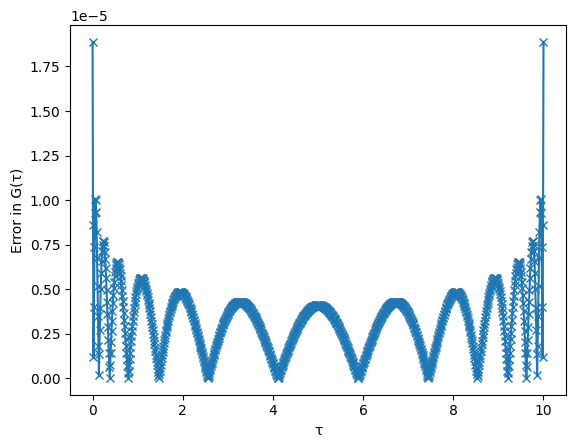

PyObject Text(24.000000000000007, 0.5, 'Error in G(τ)')

In [386]:
plt.figure()
plt.plot(τs,abs.(G_tau .- G_tau_reconst),ls="-",marker="x")
plt.xlabel("τ")
plt.ylabel("Error in G(τ)")
#plt.savefig("check_error_in_gtau.pdf")

we use singular value decompositon of K
$$
\bm{K} = \bm{U}\bm{S}\bm{V^{\dagger}}.
$$
where $\bm{U},\bm{V}$ are matrices consisteng of singular vectors and $\bm{S}$ is diagonal matrix consisting of the corresponding singular values $s_i(\ge0).$

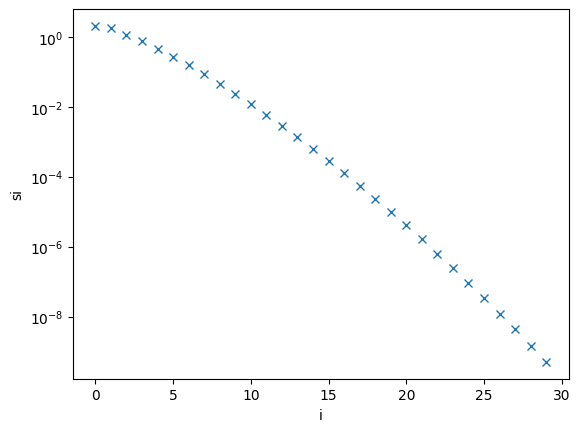

PyObject Text(24.000000000000007, 0.5, 'si')

In [387]:
u,s,v = svd(K_ij)
@assert K_ij ≈ u * Diagonal(s) * v' # ' operator denotes Hermite conjugate

plt.figure()
plt.semilogy(s[1:30],ls="",marker="x")
plt.xlabel("i")
plt.ylabel("si")
#plt.savefig("check_singular_values.pdf")

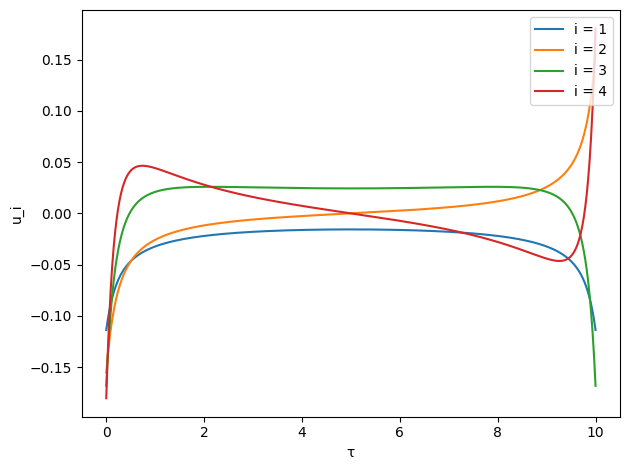

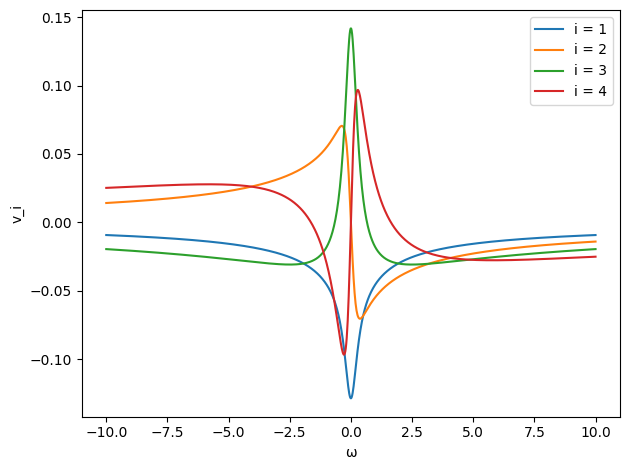

In [388]:
num_sv = 4
plt.figure()
for i in 1:num_sv
    plt.plot(τs,u[:,i],label="i = $(i)")
end
plt.xlabel("τ")
plt.ylabel("u_i")
plt.tight_layout()
plt.legend(loc="upper right")
#plt.savefig("check_u.pdf")

plt.figure()
for i in 1:num_sv
    plt.plot(ωs,v[:,i],label="i = $(i)")
end
plt.xlabel("ω")
plt.ylabel("v_i")
plt.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("check_v.pdf")



We obtain original and reconstructed $G(\tau)$/$\rho(\omega)$ projected onto $u_i$/$v_i$
$$
g_i = u_i^{\dagger}\bm{g} ,\ \rho_i = v_i^{\dagger}\bm{\rho},
$$

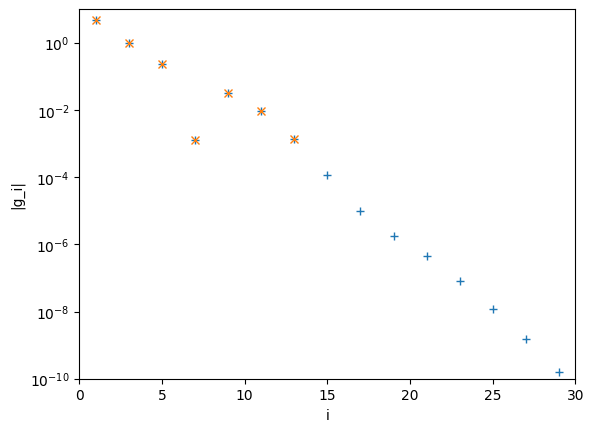

(1.0e-10, 10)

In [389]:
g_i_original = u' * G_tau
g_i_reconst  = u' * G_tau_reconst
i = [i for i in 1:length(g_i_original)]
plt.figure()
plt.semilogy(i[1:2:end],abs.(g_i_original[1:2:end]),ls="",marker="+",label="Original")
plt.semilogy(i[1:2:end],abs.(g_i_reconst[1:2:end]), ls="",marker="x",label="Reconstructed")
plt.xlabel("i")
plt.ylabel("|g_i|")
plt.xlim(0,30)
plt.ylim(1e-10,10)
#plt.savefig("check_g_i.pdf")

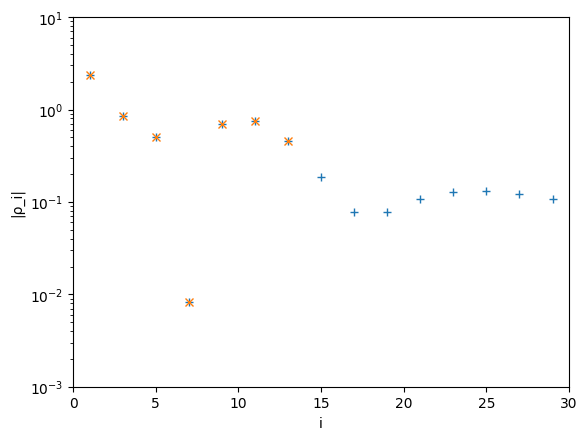

(0.001, 10)

In [390]:
ρ_i_original = v' * ρ_ω
ρ_i_reconst  = v' * ρ_ω_reconst
i = [i for i in 1:length(ρ_i_original)]
plt.figure()
plt.semilogy(i[1:2:end],abs.(ρ_i_original[1:2:end]),ls="",marker="+",label="Original")
plt.semilogy(i[1:2:end],abs.(ρ_i_reconst[1:2:end]), ls="",marker="x",label="Reconstructed")
plt.xlabel("i")
plt.ylabel("|ρ_i|")
plt.xlim(0,30)
plt.ylim(1e-3,10)
#plt.savefig("check_rho_i.pdf")

# As another spectral function $\rho(\omega)$, we use that of the Hubbard atom.
$$
\rho(\omega) = \frac{1}{2}\left[\delta(\omega + U/2) + \delta(\omega - U/2)\right]
$$
where $U$ is onsite Coulomb interaction.We fix $U=1.$

# Exercise 9
We expand some spectral function $\rho(\omega)$ in $V_l(\omega)$ using
$$
\rho_l = \int_{\omega_{\mathrm{max}}}^{\omega_{\mathrm{max}}}\mathrm{d}\omega V_l(\omega)\rho(\omega),
$$
and compute the expansion coefficients of $G(\tau)$ using
$$
G_l = - S_l \rho_l.
$$
Then evaluate $G(\tau)$ on a uniform $\tau$ mesh.

In [391]:
using PyCall 
irbasis3 = pyimport("irbasis3")

PyObject <module 'irbasis3' from '/Users/humiyakakizawa/.pyenv/versions/3.9.0/lib/python3.9/site-packages/irbasis3/__init__.py'>

In [392]:
lambda_ = 100
beta = 10
K = irbasis3.KernelFFlat(lambda_=lambda_)
basis = irbasis3.FiniteTempBasis(K,statistics="F",beta=beta,eps=1e-10)

PyObject <irbasis3.basis.FiniteTempBasis object at 0x17c96db80>

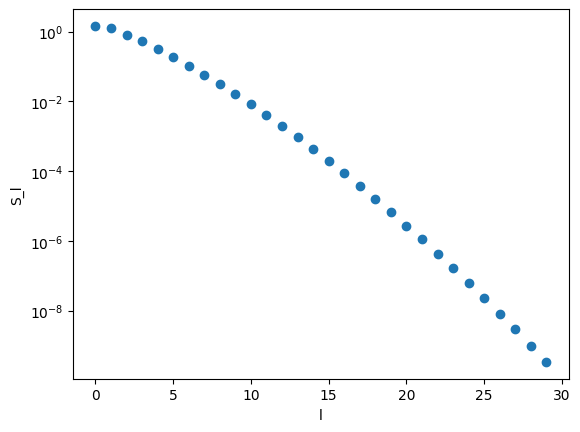

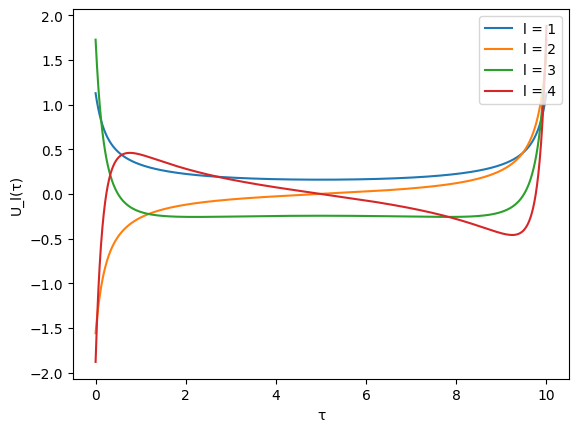

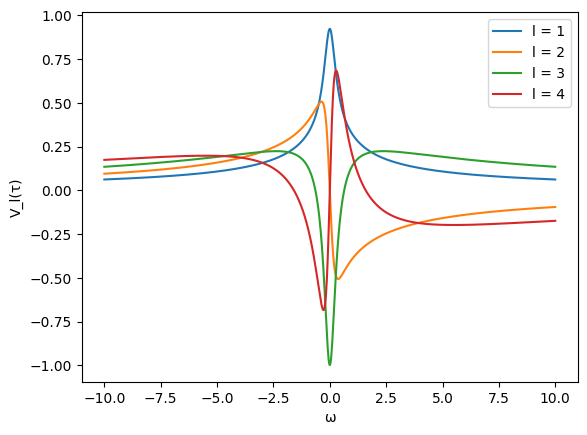

PyObject <matplotlib.legend.Legend object at 0x17addffa0>

In [393]:
# check S,U,V
plt.figure()
plt.semilogy(basis.s,ls="",marker="o")
plt.xlabel("l")
plt.ylabel("S_l")
#plt.savefig("check_irbasis_s.pdf")

N_τ = 1000
τs = collect(range(0,beta,length=N_τ))
max_l = 4
plt.figure()
for l in 1:max_l
    plt.plot(τs,basis.u[l].(τs),label="l = $(l)")
end
plt.xlabel("τ")
plt.ylabel("U_l(τ)")
plt.legend(loc="upper right")
#plt.savefig("check_irbasis_u_1.pdf")


N_ω = 1000
ω_max = 10
ωs = collect(range(-ω_max,ω_max,length=N_ω))
max_l = 4
plt.figure()
for l in 1:max_l
    plt.plot(ωs,basis.v[l].(ωs),label="l = $(l)")
end
plt.xlabel("ω")
plt.ylabel("V_l(τ)")
plt.legend(loc="upper right")
#plt.savefig("check_irbasis_v.pdf")


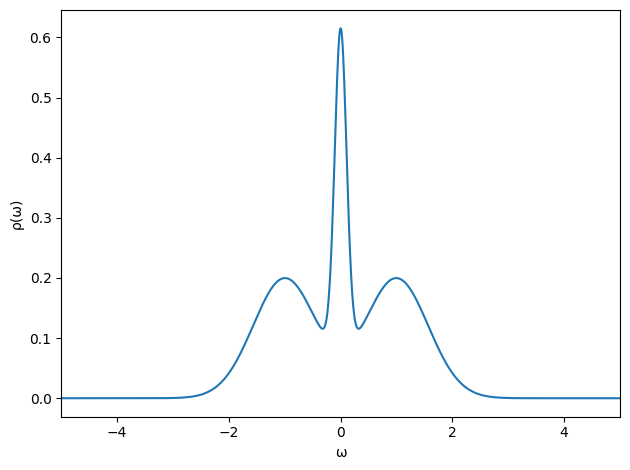

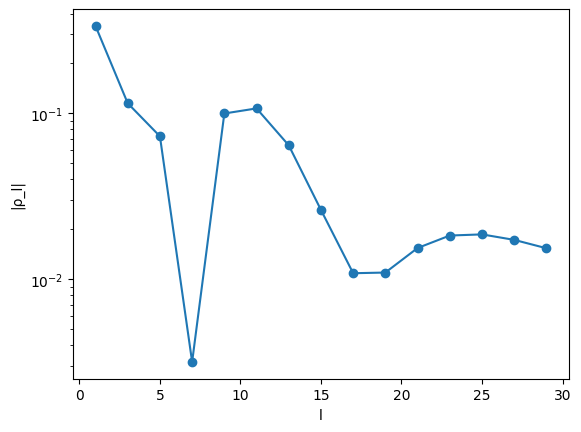

PyObject Text(24.500000000000007, 0.5, '|ρ_l|')

In [394]:
# We choose the superposition of three gausian distributions as a spectral functoin 
function gaussian(x,μ,σ)
    (1/(sqrt(2π)*σ)) * exp.(-((x .- μ)/σ) .^2 )
end

ρ = ω -> 0.2 * gaussian(ω,0.0,0.15) + 0.4 * gaussian(ω,1.0,0.8) + 0.4 * gaussian(ω,-1.0,0.8)

ω_max = 5
N_ω = 1000
ωs = collect(range(-ω_max,ω_max,length=N_ω))

plt.figure()
plt.plot(ωs,ρ.(ωs))
plt.xlabel("ω")
plt.ylabel("ρ(ω)")
plt.xlim(-5,5)
plt.tight_layout()
#plt.savefig("check_rho_omega.pdf")

ρ_l = basis.v.overlap(ρ)
ls = [l for l in 1:length(basis.s)]
plt.figure()

plt.semilogy(ls[1:2:end],abs.(ρ_l[1:2:end]),marker="o")
plt.xlabel("l")
plt.ylabel("|ρ_l|")
#plt.savefig("check_rho_l.pdf")


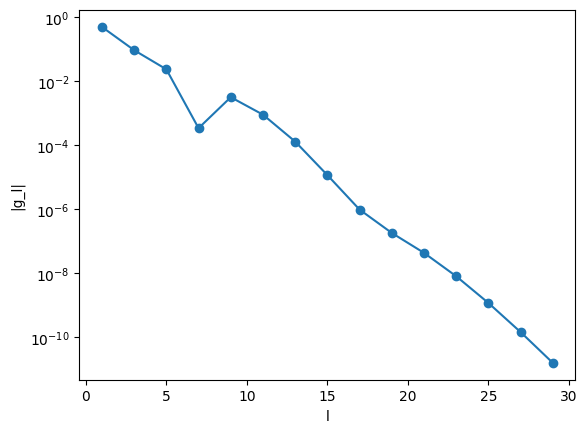

PyObject Text(24.499999999999993, 0.5, '|g_l|')

In [395]:
g_l = - basis.s .* ρ_l
plt.figure()
plt.semilogy(ls[1:2:end],abs.(g_l[1:2:end]),marker="o")
plt.xlabel("l")
plt.ylabel("|g_l|")
#plt.savefig("check_g_l.pdf")

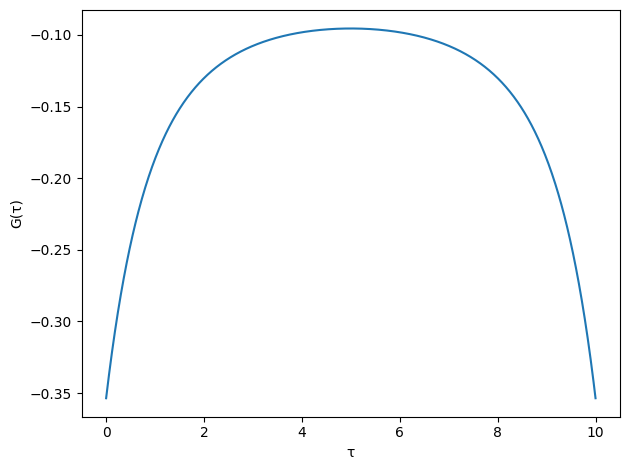

In [396]:
τs = collect(range(0,beta,length=1000))
G_tau = transpose(basis.u(τs)) * g_l
plt.figure()
plt.plot(τs,G_tau)
plt.xlabel("τ")
plt.ylabel("G(τ)")
plt.tight_layout()
#plt.savefig("check_G_tau.pdf")

reconstruct $g_l$ by numerical integraton
$$
g_l = \int_0^{\beta}\mathrm{d}\tau U_l(\tau)G(\tau)
$$

In [397]:
function eval_g_tau(τs)
    transpose(basis.u(τs)) * g_l
end

eval_g_tau (generic function with 1 method)

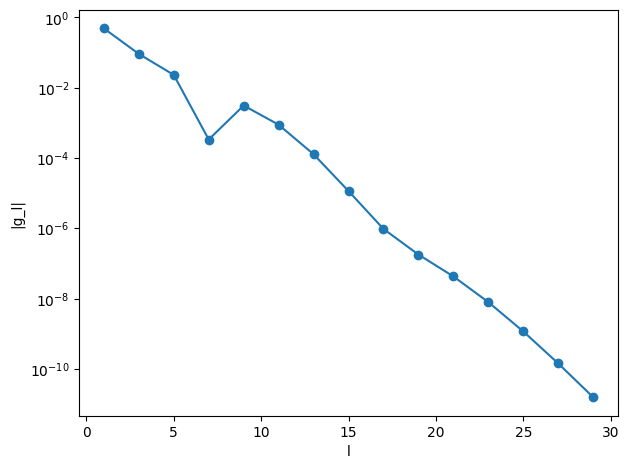

In [398]:
g_l_reconst = basis.u.overlap(eval_g_tau)
ls = [i for i in 1:length(g_l_reconst)]
plt.figure()
plt.semilogy(ls[1:2:end],abs.(g_l_reconst)[1:2:end],ls="-",marker="o")
plt.xlabel("l")
plt.ylabel("|g_l|")
plt.tight_layout()
#plt.savefig("check_g_l_numerical_integral.pdf")

# reconstruct $g_l$ by sparse sampling (fitting)
Using $\bar{\tau}_1,\cdots,\bar{\tau}_{N_{\mathrm{sample}}}$ as sampling points,we can obtain $g_l$ as
$$
g_l = \mathrm{argmin}\sum_k \left|G(\bar{\tau}_k) - \sum_{l=0}^{N_{\mathrm{sample}}-1} U_l(\bar{\tau}_k)G_l\right|
    = (\bm{F}^+\bm{g})_l,
$$
where $\bm{F}_{kl} = U_l(\bar{\tau}_k)$ and $\bm{F}^+$ is its pseudo inverse matrix.

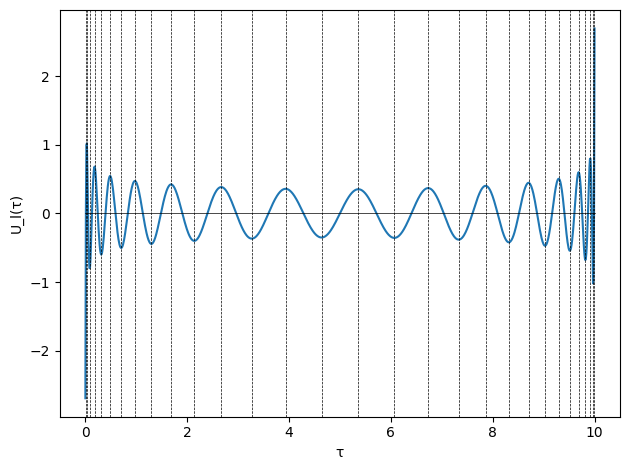

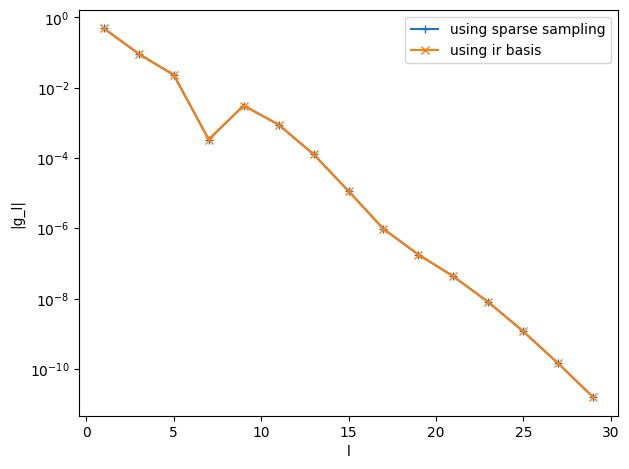

Sampling points = [0.012540375107178717, 0.025080750214357433, 0.084608404998333, 0.1796989521454872, 0.31247002491447273, 0.4859594077678564, 0.7042195121898956, 0.9723734269125226, 1.2965285468854475, 1.6833693532706349, 2.1391650644480844, 2.6679119879113684, 3.268556407887193, 3.931899929356174, 4.638747103136412, 5.361252896863588, 6.068100070643824, 6.731443592112809, 7.332088012088631, 7.860834935551916, 8.316630646729367, 8.703471453114553, 9.027626573087478, 9.295780487810104, 9.514040592232144, 9.687529975085527, 9.820301047854514, 9.915391595001667, 9.974919249785641, 9.987459624892821]
Condition number= 5.897702173686458
basis size = 30


In [399]:
smpl = irbasis3.TauSampling(basis)
println("Sampling points = $(smpl.sampling_points)")
println("Condition number= $(smpl.cond)")
g_l_reconst_sparse = smpl.fit(eval_g_tau.(smpl.sampling_points))
ls = [i for i in 1:length(g_l_reconst_sparse)]

# visualizatoin of sampling points
dim = basis.size
println("basis size = $(dim)")
plt.figure()
plt.plot(τs,basis.u[dim](τs))
plt.plot(τs,zeros(length(τs)),ls="-",color="k",marker="",lw=0.5)
for x in smpl.sampling_points
    plt.axvline(x=x,ls="--",color="k",lw=0.5)
end
plt.xlabel("τ")
plt.ylabel("U_l(τ)")
plt.tight_layout()
plt.savefig("check_sampling_points.pdf")

# comparison with g_l = - S_l rho_l
g_l = - basis.s .* ρ_l 
plt.figure()
plt.semilogy(ls[1:2:end], abs.(g_l_reconst_sparse[1:2:end]),ls="-",marker="+",label="using sparse sampling")
plt.semilogy(ls[1:2:end], abs.(g_l[1:2:end]),               ls="-",marker="x",label="using ir basis")
plt.xlabel("l")
plt.ylabel("|g_l|")
plt.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("check_sparse_sampling.pdf")


# From Matsubara-frequency domain to IR basis
$$
g_l = \mathrm{argmin}\sum_k\left|\hat{G}(i\bar{\nu}_k) - \sum_{l=0}^{N_{\mathrm{sample}}}\hat{U}_l(i\bar{\nu}_k)G_l\right|
    = (\hat{\bm{F}}^+\bm{g})_l.
$$

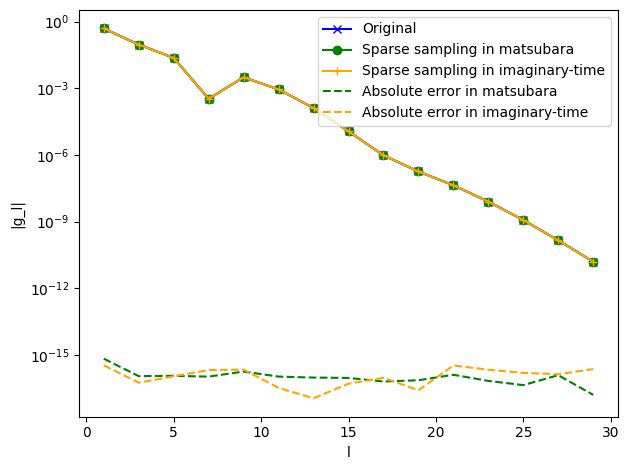

Sampling points = [-229, -215, -93, -55, -39, -29, -23, -17, -15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 23, 29, 39, 55, 93, 215, 229]
Condition number= 11.274068842692673


In [400]:
smpl_matsubara = irbasis3.MatsubaraSampling(basis)
println("Sampling points = $(smpl_matsubara.sampling_points)")
println("Condition number= $(smpl_matsubara.cond)")

function eval_g_iν(ν)
    transpose(basis.uhat(ν)) * g_l
end

g_l_reconst_sparse_matsubara = smpl_matsubara.fit(eval_g_iν(smpl_matsubara.sampling_points))
ls = [i for i in 1:length(g_l_reconst_sparse_matsubara)]

# comparison with g_l = - S_l rho_l and g_l_reconst_sparse_matsubara
g_l = - basis.s .* ρ_l 
plt.figure()
plt.semilogy(ls[1:2:end], abs.(g_l[1:2:end]),                         ls="-",marker="x",color="blue",label="Original")
plt.semilogy(ls[1:2:end], abs.(g_l_reconst_sparse_matsubara[1:2:end]),ls="-",marker="o",color="green"  ,label="Sparse sampling in matsubara")
plt.semilogy(ls[1:2:end], abs.(g_l_reconst_sparse[1:2:end]),          ls="-",marker="+",color="orange",label="Sparse sampling in imaginary-time")
plt.semilogy(ls[1:2:end], abs.(g_l_reconst_sparse_matsubara .- g_l)[1:2:end],ls="--",marker="",color="green"  ,label="Absolute error in matsubara")
plt.semilogy(ls[1:2:end], abs.(g_l_reconst_sparse           .- g_l)[1:2:end],ls="--",marker="",color="orange",label="Absolute error in imaginary-time")
plt.xlabel("l")
plt.ylabel("|g_l|")
plt.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("check_sparse_sampling_in matsubara.pdf")


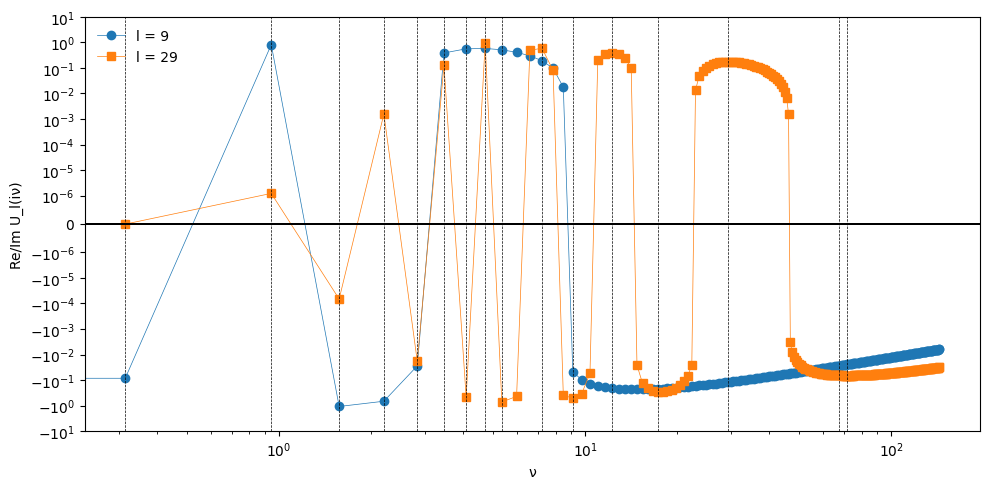

In [407]:
get_nonzero_part(l,data) = mod(l,2) == 0 ? imag(data) : real(data)

fig, ax = plt.subplots(figsize=(10,5))

ωn_max = 2*div(maximum(smpl_matsubara.sampling_points),2)
#println("ωn_max = $(ωn_max)")
nvec = 2 * collect(-ωn_max:ωn_max) .+ 1
ωs = nvec * π/beta
markers = ["o","s"]
for (idx_l,l) in enumerate([9,basis.size-1])
    #println("idx_l = $(idx_l), l = $(l)")
    ax.semilogy(ωs,get_nonzero_part(l,basis.uhat[l+1](nvec)),label="l = $(l)",ls="-",marker="$(markers[idx_l])",ms=6,lw=0.5)
end

for n in smpl_matsubara.sampling_points
    ax.axvline(n*π/beta,ls="--",color="k",lw=0.5)
    ax.axhline(0,       ls="-", color="k",lw=0.25)
end

ax.set_xscale("log")
ax.set_yscale("symlog",linthresh=1e-6)
ax.set_ylim(-10,10)
ax.set_xlabel("ν")
ax.set_ylabel("Re/Im U_l(iν)")
ax.legend(loc="upper left",frameon=false)
plt.tight_layout()
#plt.savefig("check_uhat.pdf")

# Exercise 10


# Playground

In [403]:
using FastGaussQuadrature,SpecialPolynomials

In [404]:
x, w = gausslegendre(3)

([-0.7745966692414834, 0.0, 0.7745966692414834], [0.5555555555555556, 0.8888888888888888, 0.5555555555555556])

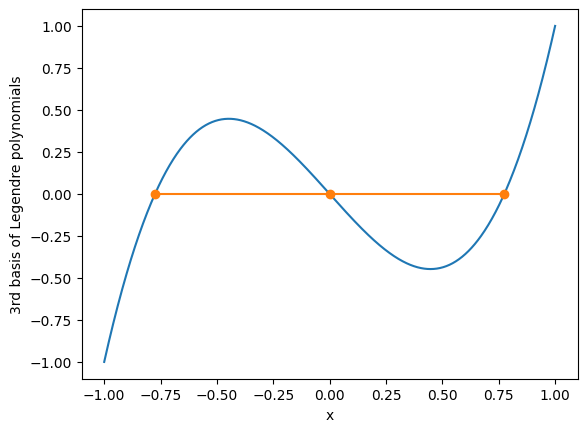

In [405]:
myfunc(x) = x^4
I = dot(w,myfunc.(x))
@assert I ≈ 2/5
p3 = SpecialPolynomials.basis(Legendre,3)
x2 = collect(range(-1,1,length=1000))

plt.figure()
plt.plot(x2,p3.(x2),label="P_3")
plt.plot(x,[0,0,0],marker="o")
plt.xlabel("x")
plt.ylabel("3rd basis of Legendre polynomials")
plt.savefig("check_gaussquad.pdf")

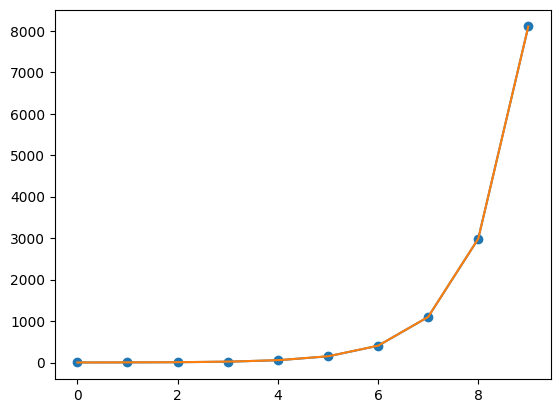

In [406]:
x = collect(range(0,9,length=10))
y = exp.(x)
f = LinearInterpolation(x,y)

xnew = collect(range(0,9,length=10000))
ynew = f(xnew)

plt.figure()
plt.plot(x,y,marker="o")
plt.plot(xnew,ynew)
plt.savefig("check_interpolate.pdf")